# **Pima Indian Diyabet Veri Seti: Ayrıntılı Açıklama**

Bu veri seti, diyabet hastalığının erken teşhisini desteklemek amacıyla hazırlanmış ve Ulusal Diyabet ve Sindirim ve Böbrek Hastalıkları Enstitüsü tarafından derlenmiştir. Özellikle Pima Kızılderili kökenli, en az 21 yaşındaki kadınlardan alınan veriler üzerinde çalışmaktadır. Bu çalışmanın amacı, bir hastanın belirli tıbbi ölçümlerine dayanarak diyabet hastası olup olmadığını öngörmektir.

---

## **1. Veri Setinin Arka Planı**
- **Kaynak:** Ulusal Diyabet ve Sindirim ve Böbrek Hastalıkları Enstitüsü.
- **Kapsam:** Daha geniş bir veritabanından seçilen örnekler, yalnızca belirli kriterlere uyan hastaları içermektedir.
- **Hedef:** Tıbbi ölçümlerle bir hastanın diyabet olup olmadığını tahmin etmek.
- **Demografi:** Veriler yalnızca Pima Kızılderili kökenli kadınlardan alınmıştır ve katılımcılar 21 yaş ve üzerindedir.

---

## **2. Veri Setinin İçeriği**
Veri seti, bir hedef değişken ve bir dizi tıbbi tahmin (bağımsız) değişkenden oluşmaktadır.

### **Bağımsız Değişkenler (Predictor Variables):**

1. **Pregnancies (Hamilelikler):**  
   Hastanın yaşamı boyunca kaç kez hamile kaldığını belirtir.

2. **Glucose (Glikoz):**  
   Oral glikoz tolerans testinde 2 saat içinde ölçülen plazma glikoz konsantrasyonu. Bu değişken, diyabet riskini belirlemede kritik bir rol oynar.

3. **BloodPressure (Kan Basıncı):**  
   Hastanın diyastolik (küçük tansiyon) kan basıncı (mm Hg cinsinden).

4. **SkinThickness (Deri Kalınlığı):**  
   Triseps deri kıvrımı kalınlığı (mm). Yağ oranını ölçmek için kullanılan önemli bir metrik.

5. **Insulin (İnsülin):**  
   2 saatlik serum insülin seviyesi (mu U/ml). Diyabetin biyolojik belirtilerini anlamak için önemli bir değişkendir.

6. **BMI (Beden Kitle İndeksi):**  
   Hastanın ağırlık ve boy oranını ifade eder:  
   \[
   \text{BMI} = \frac{\text{Ağırlık (kg)}}{\text{Boy (m)}^2}
   \]

7. **DiabetesPedigreeFunction (Diyabet Soygeçmişi Fonksiyonu):**  
   Ailedeki diyabet geçmişine dayalı olarak genetik riskin ölçülmesini sağlar.

8. **Age (Yaş):**  
   Hastanın yaşı (yıl olarak). Yaş, diyabet gelişiminde önemli bir risk faktörüdür.

---

### **Bağımlı Değişken (Target Variable):**

9. **Outcome (Sonuç):**  
   Hastanın diyabet durumu:  
   - **0:** Diyabet değil.  
   - **1:** Diyabet var.  
   - 768 hasta verisi içeren bu veri setinde, 268 kişi (%34.9) diyabet hastasıdır.

In [456]:
# Importing libraries
import numpy as np
import pandas as pd
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

%matplotlib inline

In [457]:
data = pd.read_csv("/kaggle/input/pima-indians-diabetes-database/diabetes.csv")

In [458]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [459]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [460]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**Checking Null Values**

In [461]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

**Checking Duplicate Values**

In [462]:
data.duplicated().sum()

0

# Data Visiluation

<Axes: xlabel='Outcome', ylabel='count'>

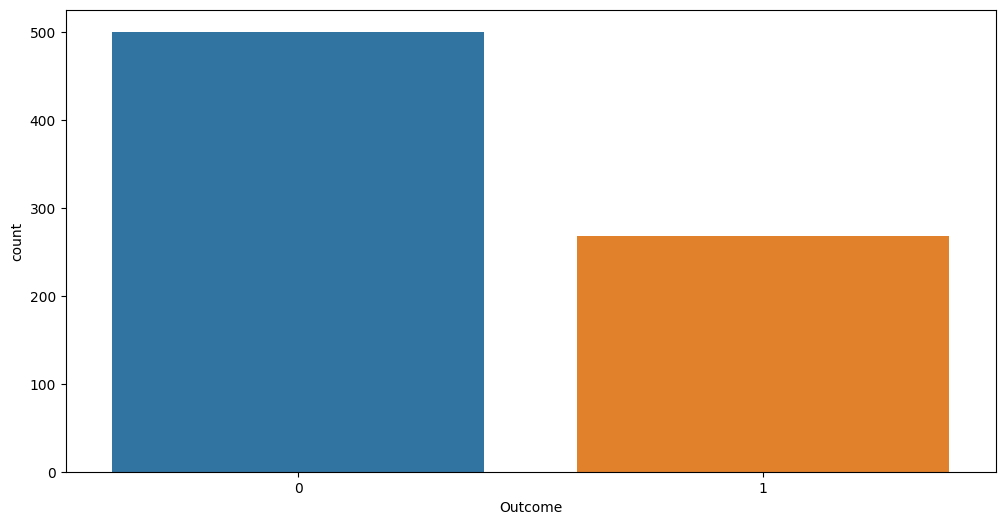

In [463]:
plt.figure(figsize = (12,6))
sns.countplot(x = "Outcome", data = data)

**Obzerving Outliers**

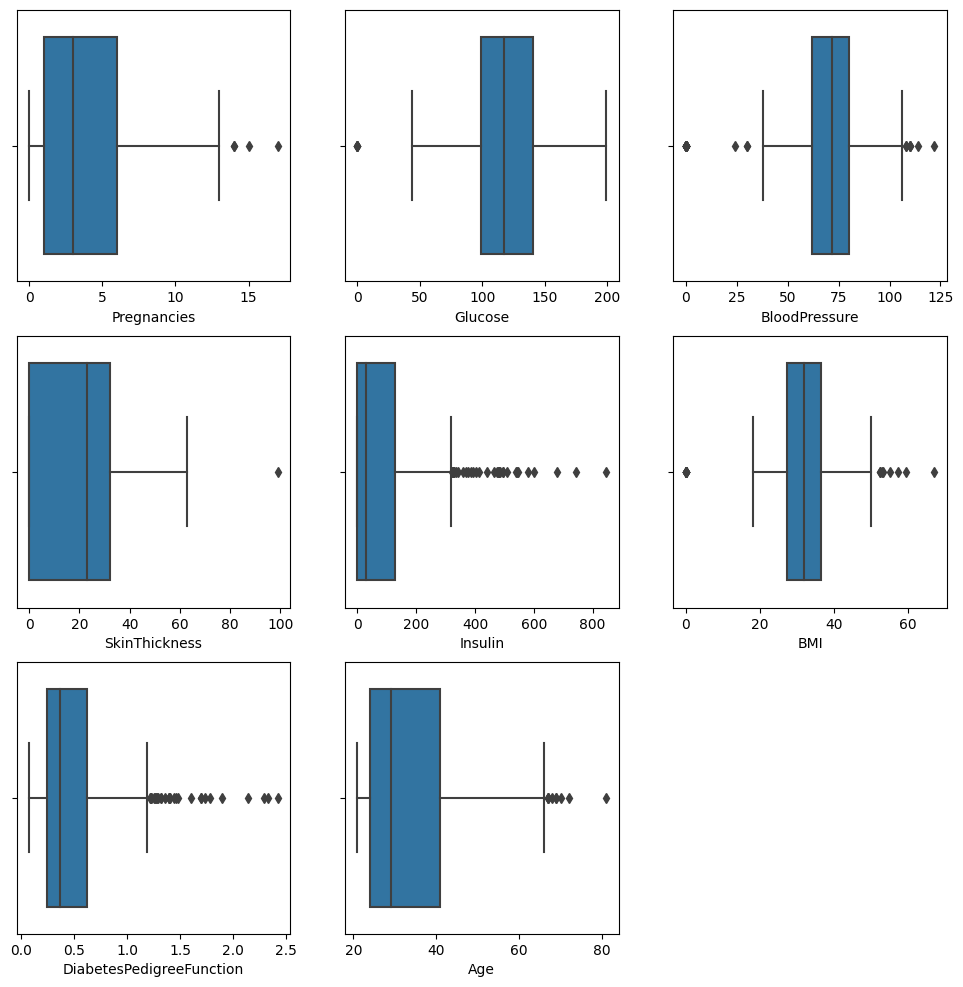

In [464]:
plt.figure(figsize = (12,12))
for i, col in enumerate(["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]):
    plt.subplot(3,3, i+1)
    sns.boxplot(x = col, data = data)

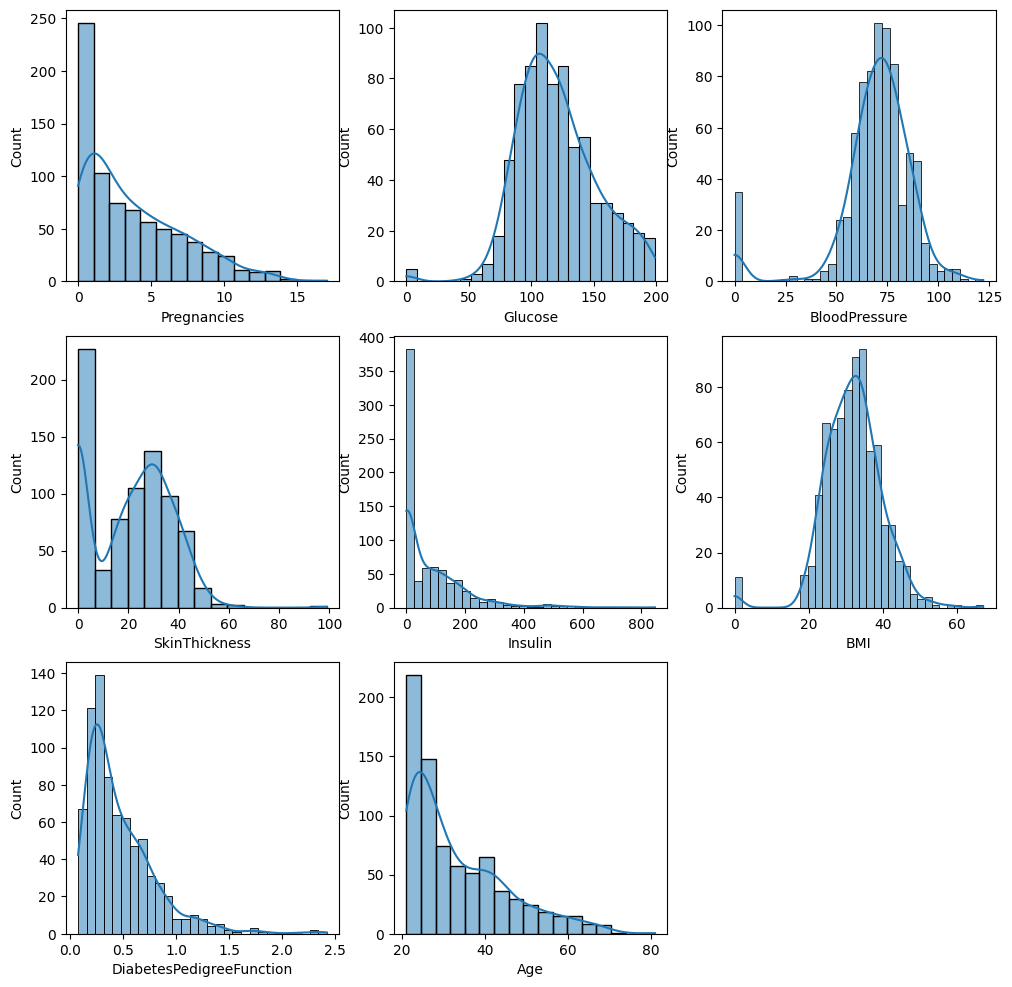

In [465]:
plt.figure(figsize = (12,12))
for i, col in enumerate(["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]):
    plt.subplot(3,3, i+1)
    sns.histplot(x = col, data = data, kde= True)

<Axes: >

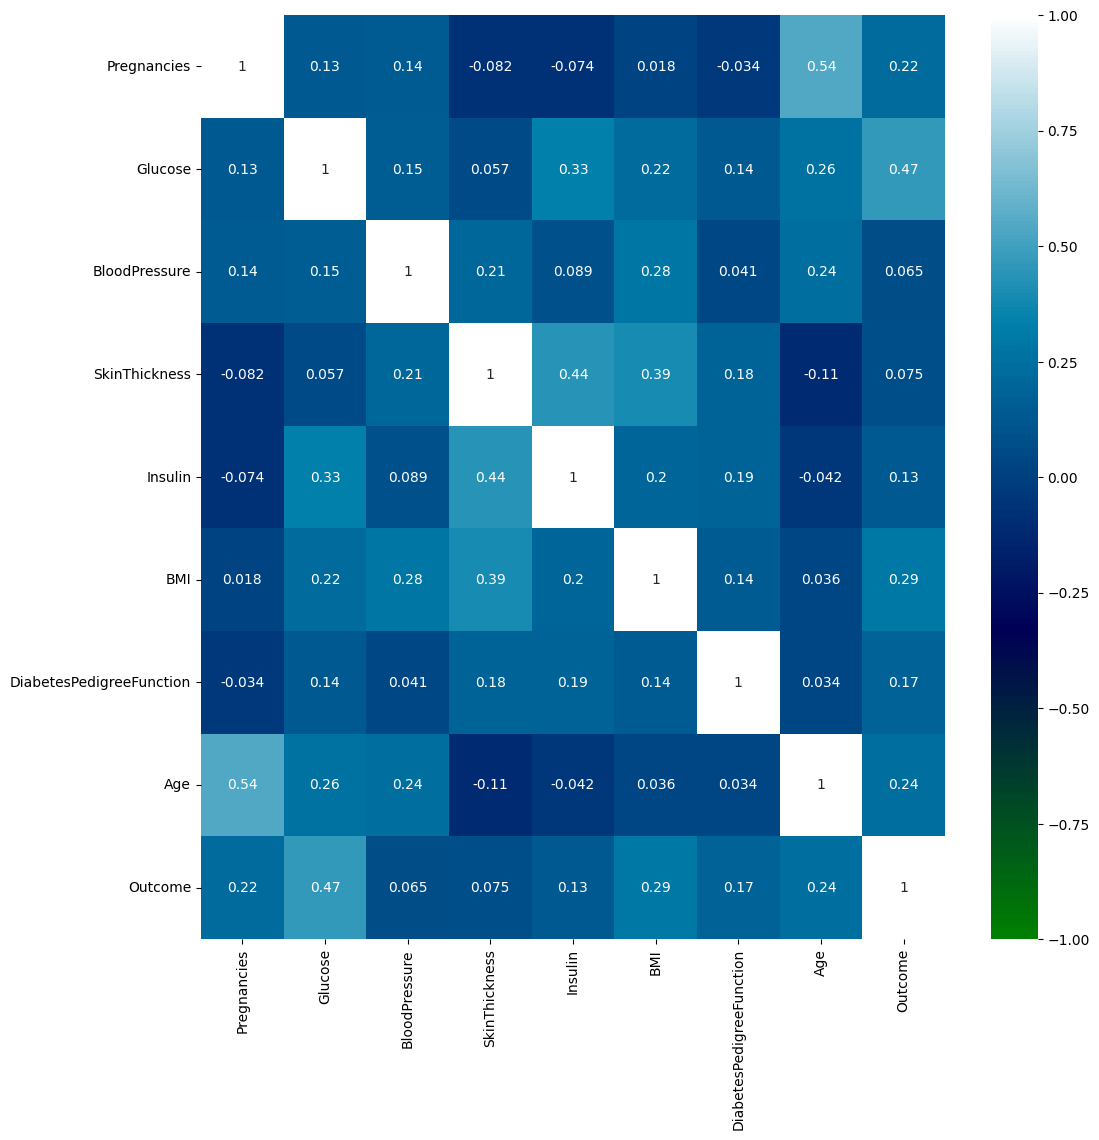

In [466]:
plt.figure(figsize=(12, 12))
sns.heatmap(data.corr(), vmin=-1.0, center=0, cmap="ocean", annot=True)

**Standart Scaling and Label Encoding**

In [467]:
features = data.drop("Outcome", axis=1)
features

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [468]:
from sklearn.preprocessing import StandardScaler

# Create scaler
scaler = StandardScaler()

# Get feature names (all columns except Outcome)
features = data.drop("Outcome", axis=1)

X = pd.DataFrame(
    scaler.fit_transform(features),
    columns=features.columns
)

In [469]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


In [470]:
y = data["Outcome"]

In [471]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [472]:
from sklearn.neighbors import KNeighborsClassifier

n_samples = len(X_train)
max_k = int(np.sqrt(n_samples))  
k_range = range(1, max_k, 2)    

# Skorları kaydet
train_scores = []
test_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

In [473]:
max_train_score = max(train_scores)
train_score_index = [i for i, v in enumerate(train_scores) if v == max_train_score]
k_values = [k_range[i] for i in train_score_index]

print("Max Test score {} % and k{}".format(max_train_score * 100, k_values))

Max Test score 100.0 % and k[1]


In [474]:
max_test_score = max(test_scores)
test_score_index = [i for i, v in enumerate(test_scores) if v == max_test_score]
k_values = [k_range[i] for i in test_score_index]

print("Max Test score {} % and k{}".format(max_test_score * 100, k_values))

Max Test score 77.92207792207793 % and k[13]


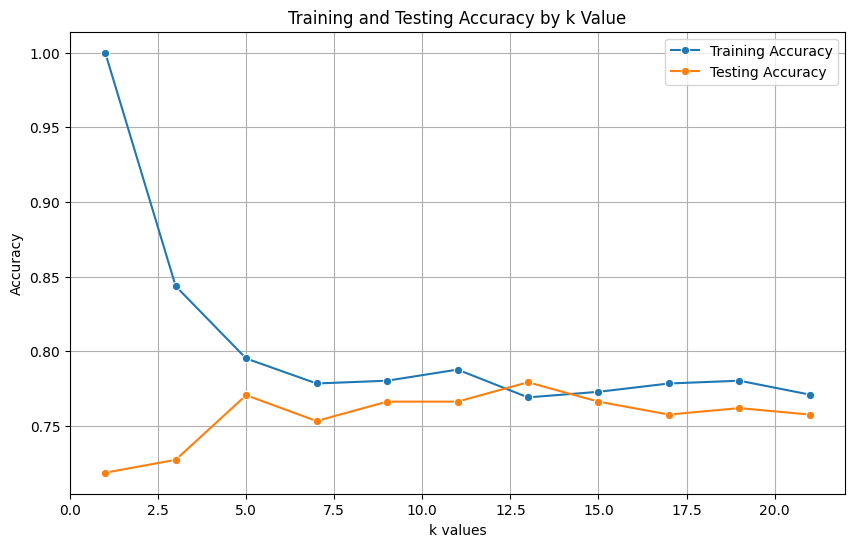

Best k value: [13]
Best test accuracy: 0.7792


In [475]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=k_range, y=train_scores, marker='o', label='Training Accuracy')
sns.lineplot(x=k_range, y=test_scores, marker='o', label='Testing Accuracy')
plt.xlabel('k values')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy by k Value')
plt.grid(True)
plt.show()

print(f'Best k value: {k_values}')
print(f'Best test accuracy: {max(test_scores):.4f}')

In [476]:
knn = KNeighborsClassifier(13)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.7792207792207793

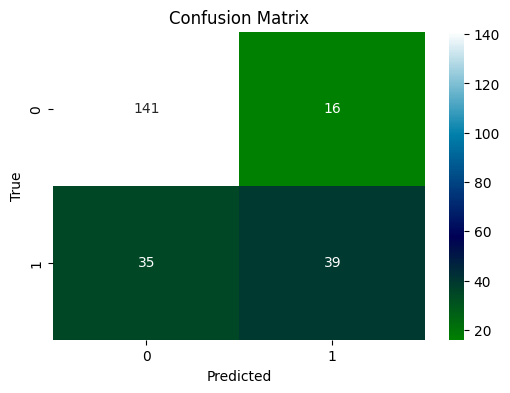

Accuracy: 77.92%
Precision: 70.91%
Recall: 52.70%
F1 Score: 60.47%


In [477]:
y_pred = knn.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred) * 100
precision = precision_score(y_test, y_pred) * 100
recall = recall_score(y_test, y_pred) * 100
f1 = f1_score(y_test, y_pred) * 100

# Create confusion matrix plot
plt.figure(figsize=(6, 4))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='ocean')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Print metrics
print(f"Accuracy: {accuracy:.2f}%")
print(f"Precision: {precision:.2f}%")
print(f"Recall: {recall:.2f}%")
print(f"F1 Score: {f1:.2f}%")

In [478]:
# Get classification report as dictionary
report_dict = classification_report(y_test, y_pred, output_dict=True)

# Convert to DataFrame for better visualization
df_report = pd.DataFrame(report_dict).transpose()

# Round all values to 2 decimal places
df_report = df_report.round(2)

# Improve column names
df_report.columns = ['Precision', 'Recall', 'F1-Score', 'Support']

# Print the formatted report
print("\nClassification Report:")
print("-" * 60)
print(df_report)


Classification Report:
------------------------------------------------------------
              Precision  Recall  F1-Score  Support
0                  0.80    0.90      0.85   157.00
1                  0.71    0.53      0.60    74.00
accuracy           0.78    0.78      0.78     0.78
macro avg          0.76    0.71      0.73   231.00
weighted avg       0.77    0.78      0.77   231.00
